In [1]:
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import factorial

In [6]:
def display_result(x, y, dy):
    
    plt.figure(figsize=(7,15))
    plt.plot(x, y, label = "function")
    plt.plot(x, dy, label = "derivative")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.gca().set_aspect("equal")
    plt.legend()
    plt.show()
    
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    left = point - precision
    right = point + precision
    return (function(right) - function(left) ) / (2 * precision)

def plot_derivative(function, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function and its derivative. 
    The `derivative` parameter is optional and can be provided as a separate function.
    If it's not provided, the derivative will be calculated automatically
    """
    # We're using vectorized functions to make our code simpler: this only hides the for-loop,
    # it doesn't provide any performance gain
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)
    
    dy = []
    if derivative is None:
        dy = np.vectorize(calculate_derivative_at_point)(function, x)
    else:
        dy = np.vectorize(derivative)(x)
    display_result(x, y, dy)
    

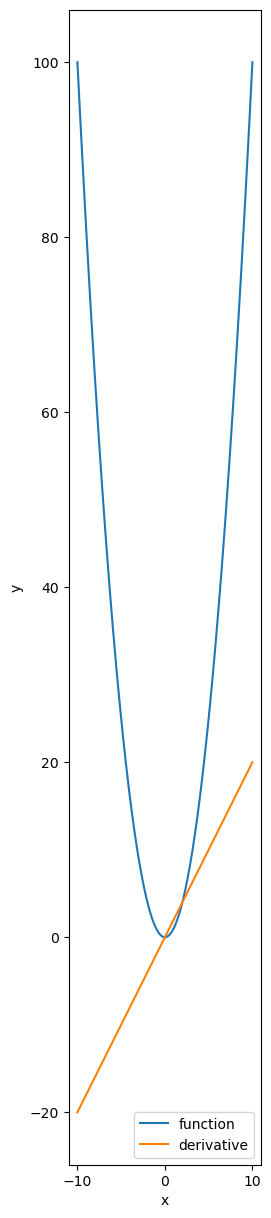

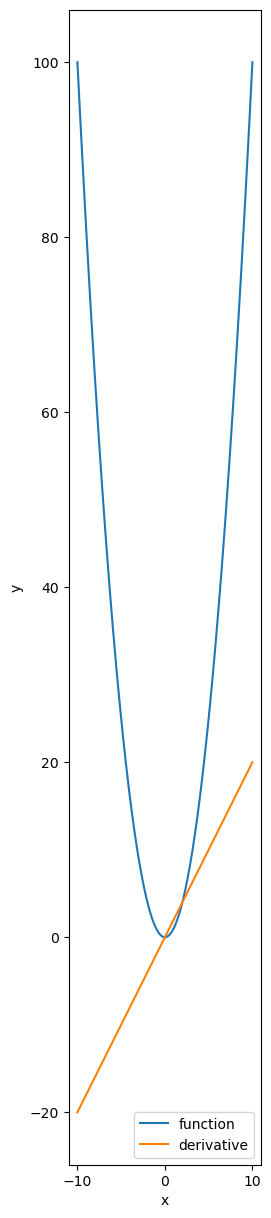

In [7]:
plot_derivative(lambda x: x ** 2, lambda x: 2 * x) # The derivative is calculated by hand
plot_derivative(lambda x: x ** 2) # The derivative is not pre-calculated, should be calculated inside the function

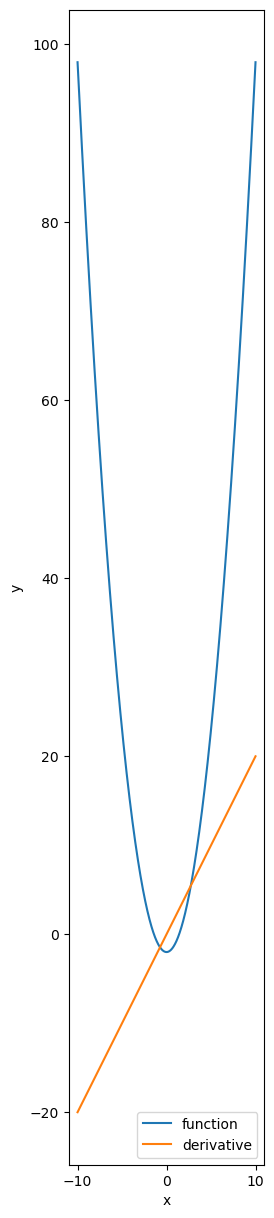

In [8]:
plot_derivative(lambda x: x**2 -2)

# Taylor expansion

$$f(x) = sin(x), a = 0$$

$$f(x)|_{x=a}=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^2+\cdots+\frac{f^{(n)}(a)}{n!}(x-a)^n+\cdots$$

$$f(x)|_{x=a}=f(0)+f'(0)(x-0)+\frac{f''(0)}{2!}(x-0)^2+\cdots+\frac{f^{(n)}(0)}{n!}(x-a)^n+\cdots$$

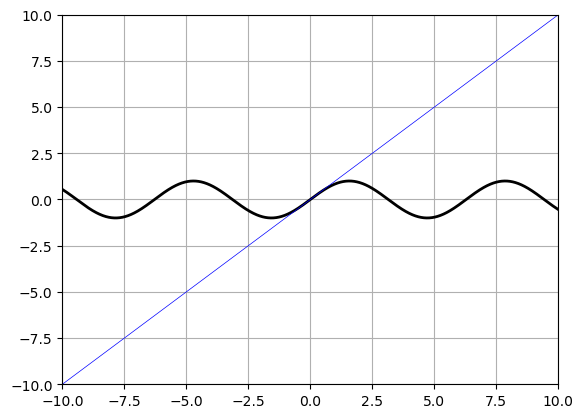

In [101]:
#Prepare the sin function on a domain/range [-10, 10]
def prepare_sin(x_min, x_max, num_points = 2000):
    x = np.linspace(x_min, x_max, num_points)
    y = np.sin(x)
    plt.plot(x, y, 'k', linewidth=2)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.grid(True)
    return x
    
prepare_sin(-10, 10)

# First-order Taylor expansion - Linear approximation on top of sin func
P = [1, 0]  # Define the coef of the polynomial - biggest to smallest 
f_x_t_1 = np.polyval(P, x) #Evaluate the polynomial to get the linear fit 
plt.plot(x, f_x_t_1, 'blue', linewidth=0.5)



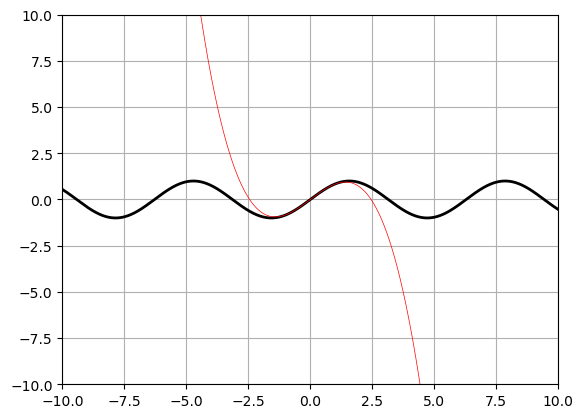

In [98]:
prepare_sin(-10, 10)
# Third-order Taylor expansion - Qubick approximation on top of sin func
P = [-1 / factorial(3), 0, 1, 0] 
f_x_t_3 = np.polyval(P, x)
plt.plot(x, f_x_t_3, 'red', linewidth=0.5)



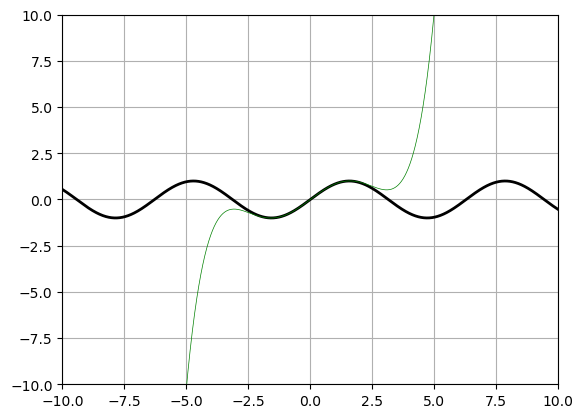

In [99]:
prepare_sin(-10, 10)
# Fifth-order Taylor expansion - Quintic approximation on top of sin func
P = [1 / factorial(5), 0, -1 / factorial(3), 0, 1, 0] 
f_x_t_5 = np.polyval(P, x);
plt.plot(x, f_x_t_5, 'green', linewidth=0.5)




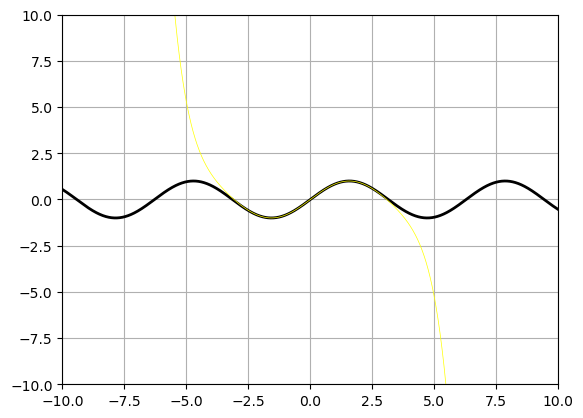

In [100]:
prepare_sin(-10, 10)
# Seventh-order Taylor expansion
P = [-1 / factorial(7), 0, 1 / factorial(5), 
     0, -1 / factorial(3), 0, 1, 0]
f_x_t_7 = np.polyval(P, x);
plt.plot(x, f_x_t_7, 'yellow', linewidth=0.5)